# Cars and tanks trial run

In [1]:
# Preference variables
LAST_TRAIN_MODE=False

In [2]:
import os
import requests

model_file = "yolo11_cnt_last.pt" if LAST_TRAIN_MODE else "yolo11_cnt_best.pt"

if not os.path.exists(model_file):
    dl_link = {
        "yolo11_cnt_best.pt": "https://drive.google.com/uc?export=download&id=1zfCXSVrKpa38N9EauT-Z18xXgFPl6kuI",
        "yolo11_cnt_last.pt": "https://drive.google.com/uc?export=download&id=1_gkYs4yPl8kTgON-uJBKfsX3bAP5cf42"
    }

    with requests.get(dl_link[model_file], stream=True) as response:
        response.raise_for_status()
        with open(model_file, "wb") as f:
            for c in response.iter_content(chunk_size=1024 * 256):
                f.write(c)
        print("Pretrained file has been downloaded successfully.")


This notebook evaluates accuracy from external source images as well as annotate the object


0: 960x960 car 1.00, tank 0.00, 96.6ms
1: 960x960 tank 1.00, car 0.00, 96.6ms
2: 960x960 tank 0.99, car 0.01, 96.6ms
3: 960x960 tank 1.00, car 0.00, 96.6ms
4: 960x960 car 1.00, tank 0.00, 96.6ms
5: 960x960 car 0.99, tank 0.01, 96.6ms
6: 960x960 car 1.00, tank 0.00, 96.6ms
7: 960x960 car 0.93, tank 0.07, 96.6ms
Speed: 29.3ms preprocess, 96.6ms inference, 0.0ms postprocess per image at shape (1, 3, 960, 960)


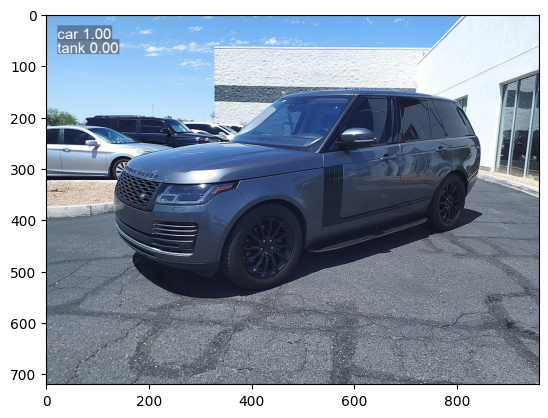

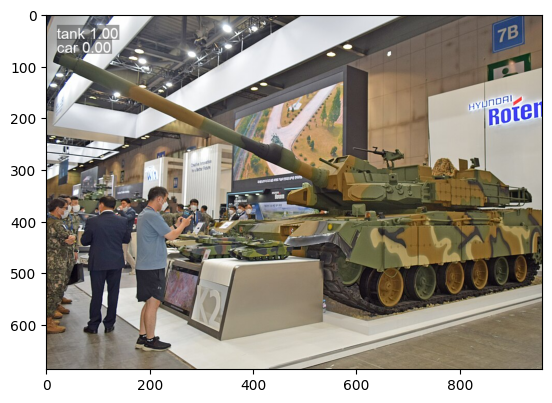

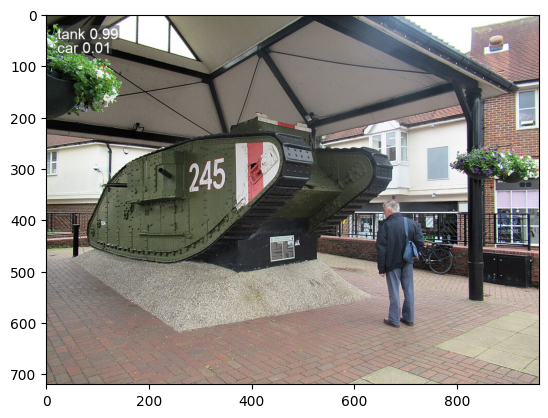

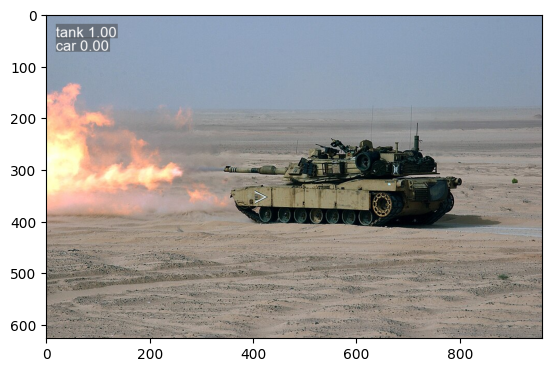

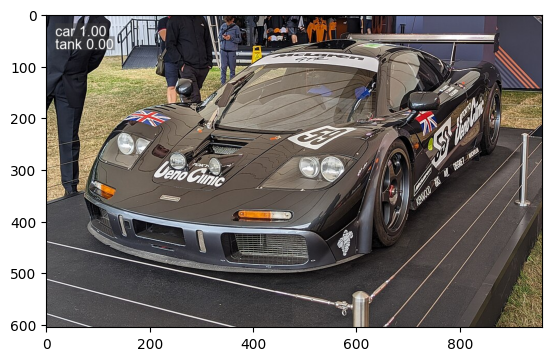

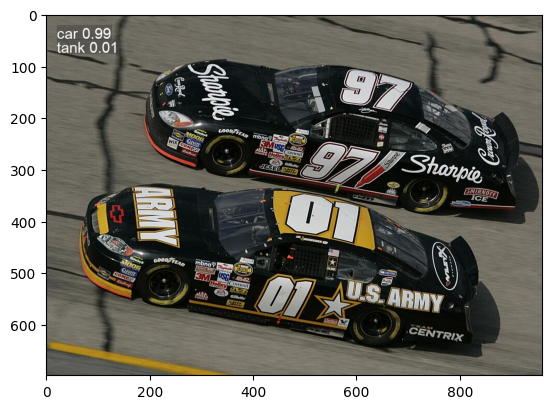

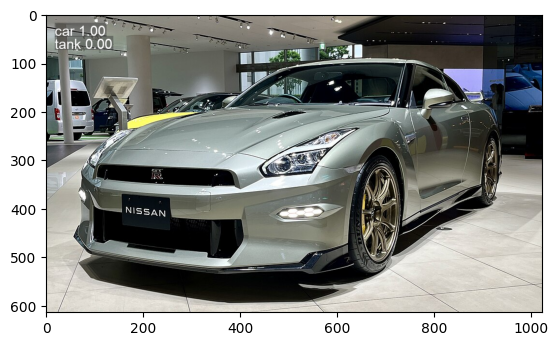

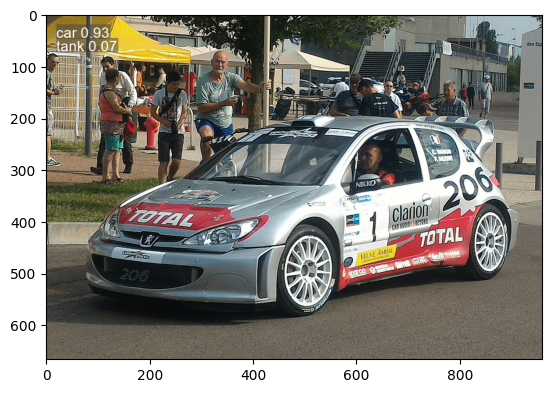

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

from pathlib import Path

img_data_dir = Path("data/images/")
imgs = [str(candidate)
        for ext_pattern in (
            '*.jpg',
            '*.png',
            '*.jpeg'
        )
        for candidate in img_data_dir.glob(ext_pattern)]

if not imgs:
    raise FileNotFoundError("Detection aborted due to no images with eligible extensions (JPG or PNG format) found.")

model = YOLO(model_file)

results = model.predict(imgs, conf=0.7, imgsz=960)

for r in results:
    plotted_img = cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB)
    plt.imshow(plotted_img)
    plt.show()